# Import Data

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

random_state = 3

In [94]:
def plot_model_history(history):
    """Plot the training and validation history for a TensorFlow network"""

    # Extract loss and accuracy
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["MAPE"]
    val_acc = history.history["val_MAPE"]
    n_epochs = len(loss)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].plot(np.arange(n_epochs), loss, label="Training")
    ax[0].plot(np.arange(n_epochs), val_loss, label="Validation")
    ax[0].legend()
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")

    ax[1].plot(np.arange(n_epochs), acc, label="Training")
    ax[1].plot(np.arange(n_epochs), val_acc, label="Validation")
    ax[1].legend()
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Mean Absolute Percent Error")


In [95]:
NN_data = pd.read_csv("Data/NNData.csv")
NN_data["AvgDBSquared"] = NN_data["AvgDB"] ** 2
NN_data

,Index,DT,Energy,Jan,Feb,Mar,Apr,May,Jun,Jul,...,RetailHols,WkBeforeXMas,WkAfterXMas,Trend2010,AvgDB,LagDB,Lag2DB,AvgWind,AvgClouds,AvgDBSquared
0,0,1/1/17,242.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.00,46.77,36.66,36.72,5.24,4.39,2187.4329
1,1,1/2/17,257.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.01,45.10,46.77,36.66,5.66,8.00,2034.0100
2,2,1/3/17,265.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.01,45.37,45.10,46.77,5.63,7.75,2058.4369
3,3,1/4/17,253.79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.01,48.87,45.37,45.10,8.61,3.71,2388.2769
4,4,1/5/17,305.91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.01,34.49,48.87,45.37,3.84,6.06,1189.5601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,12/27/19,262.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.99,47.83,43.47,39.38,2.08,3.76,2287.7089
1091,1091,12/28/19,238.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.99,51.19,47.83,43.47,1.76,1.86,2620.4161
1092,1092,12/29/19,240.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.99,53.24,51.19,47.83,3.33,7.78,2834.4976
1093,1093,12/30/19,235.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,10.00,62.12,53.24,51.19,9.17,3.87,3858.8944


In [96]:
X = NN_data.values[:,3:]
X = NN_data[["AvgDB", "AvgDBSquared"]]
y = NN_data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

In [ ]:
plt.hist(NN_data["AvgDB"])

#try making neural net with only the hot or cold side

# Also try to make a two pronged neural net like stu's

In [97]:
# Change datatype
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# Scale data
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_train_scaled = y_train_scaled.reshape(-1,)

# Model

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequantial1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc4 (Dense)                     │ (None, 1)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

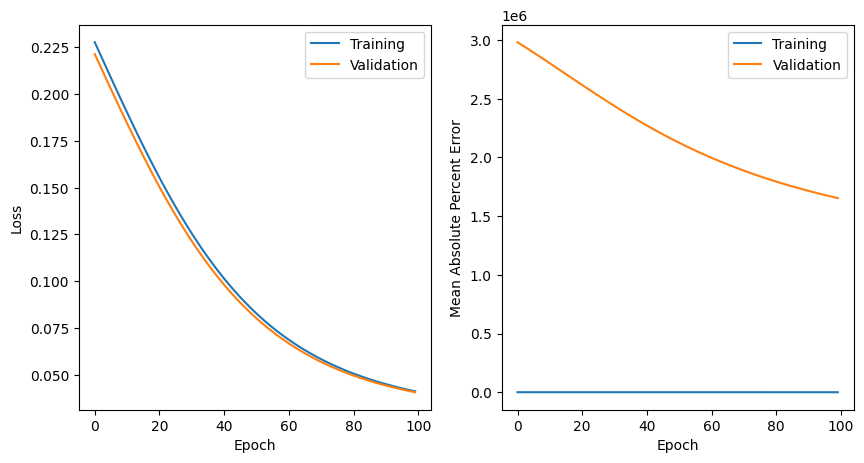

In [117]:
# Initialize the model. 
model = Sequential(name="sequantial1")
# For each layer you need to add the number of Neurons and the activation. 
# We have 27 features so that goes in input_shape
model.add(Dense(5, input_shape=(2,), name="fc1"))
model.add(Activation(activation="sigmoid", name="relu1"))
model.add(Dense(5, input_shape=(2,), name="fc2"))
model.add(Activation(activation="sigmoid", name="relu2"))
model.add(Dense(1, name="fc4"))
model.add(Activation(activation="sigmoid", name="relu3"))
model.summary()

model.compile(optimizer="sgd", loss=["MSE"], metrics=["MAPE"])
history = model.fit(X_train_scaled, y_train_scaled, batch_size=128, epochs=100, validation_split=0.25, shuffle=True, verbose=0)

plot_model_history(history)

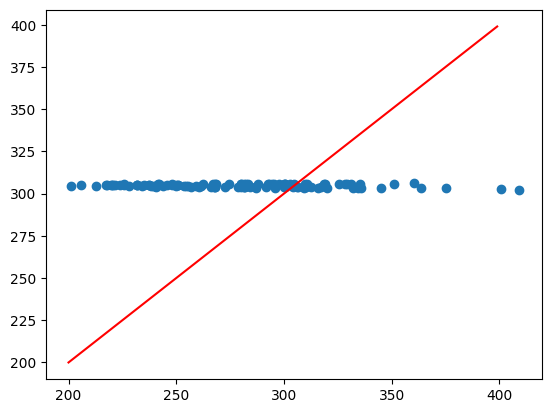

In [118]:
y_keras = model.predict(X_test_scaled, batch_size=10, verbose=0)

plt.scatter(y_test, scaler_y.inverse_transform(y_keras))
plt.plot(np.arange(200,400), np.arange(200,400), color = "r")
plt.show()